In [167]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import math
import thinkplot
import thinkstats2
import regression
import timeseries
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [168]:
crime_data=pd.read_csv("crime_records.csv",encoding='ISO-8859-1' )#opening the crime data file
crime_data.head()#checking out the first few rows of the dataframe

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [169]:
crime_data #data shows to be 624038 rows x 10 columns. I also see that I will have some missing values. 

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06
...,...,...,...,...,...,...,...,...,...,...
624033,Vehicle Collision or Pedestrian Struck (with I...,2013,12,23,13,31,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06
624034,Vehicle Collision or Pedestrian Struck (with I...,2014,3,11,9,20,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06
624035,Vehicle Collision or Pedestrian Struck (with I...,2018,8,4,16,22,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06
624036,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.000000,5.455143e+06


In [170]:
crime_data.dtypes #looking at the data types for each columns 

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR               int64
MINUTE             int64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
dtype: object

In [171]:
crime_data.isnull().sum() #looking to see the count of NAN in each column

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR                 0
MINUTE               0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    64962
X                  120
Y                  120
dtype: int64

In [172]:
def missing(dff): #creating a function to see the missing values in percentage
    print (round((dff.isnull().sum() * 100/ len(dff)),4).sort_values(ascending=False))
missing(crime_data)

NEIGHBOURHOOD    10.4099
Y                 0.0192
X                 0.0192
HUNDRED_BLOCK     0.0021
MINUTE            0.0000
HOUR              0.0000
DAY               0.0000
MONTH             0.0000
YEAR              0.0000
TYPE              0.0000
dtype: float64


Looking at the percentages Neighbourhood data is missing the most by 10.4%, followed by the X and Y coordinates around 0.02% for both, and hundred block missing by mere 0.002%. I am going to go forward with my analysis due to having data in the columns that I need.

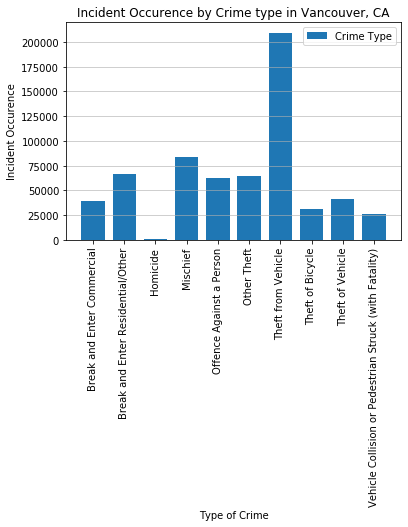

In [173]:
Types = crime_data['TYPE']
plt.figure(figsize=(6,4))
plt.hist(Types, rwidth=0.75, align='left')
plt.title('Incident Occurence by Crime type in Vancouver, CA')
plt.xlabel('Type of Crime')
plt.xticks(rotation='vertical')
plt.ylabel('Incident Occurence')
plt.legend(("Crime Type",),loc=1, prop={'size': 10})
plt.grid(axis='y', alpha=0.75)

In [174]:
crime_typeinfo = crime_data["TYPE"].value_counts()
print(crime_typeinfo)#looking at the overall dataset, Theft from Vehicle is the most frequent type of crime.

Theft from Vehicle                                        209609
Mischief                                                   83970
Break and Enter Residential/Other                          66378
Other Theft                                                64611
Offence Against a Person                                   62078
Theft of Vehicle                                           41528
Break and Enter Commercial                                 38916
Theft of Bicycle                                           31112
Vehicle Collision or Pedestrian Struck (with Injury)       25294
Vehicle Collision or Pedestrian Struck (with Fatality)       290
Homicide                                                     252
Name: TYPE, dtype: int64


Text(0, 0.5, 'Crime Occurance')

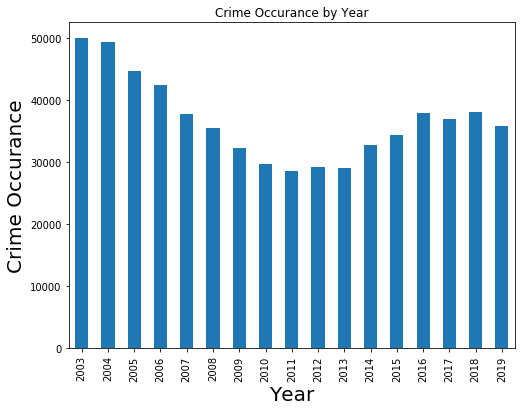

In [175]:
crime_year = crime_data["YEAR"].value_counts()
crime_year.sort_index(inplace=True)
year_plot = crime_year.plot.bar(title='Crime Occurance by Year', figsize=(8,6))
year_plot.set_xlabel('Year',size=20)
year_plot.set_ylabel('Crime Occurance',size=20)

Text(0, 0.5, 'Crime Occurance')

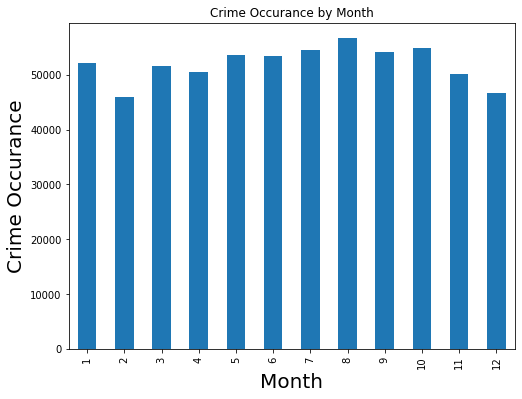

In [176]:
crime_month = crime_data["MONTH"].value_counts() #Crime counts by month for all years 2003-2019
crime_month.sort_index(inplace=True)
month_plot = crime_month.plot.bar(title='Crime Occurance by Month', figsize=(8,6))
month_plot.set_xlabel('Month',size=20)
month_plot.set_ylabel('Crime Occurance',size=20)

In [177]:
crime_monthinfo = crime_data["MONTH"].value_counts()
print(crime_monthinfo)#looking at the overall dataset, august had the highest number of crimes

8     56623
10    54813
7     54522
9     54216
5     53573
6     53389
1     52082
3     51579
4     50477
11    50094
12    46738
2     45932
Name: MONTH, dtype: int64


Text(0, 0.5, 'Crime Occurance')

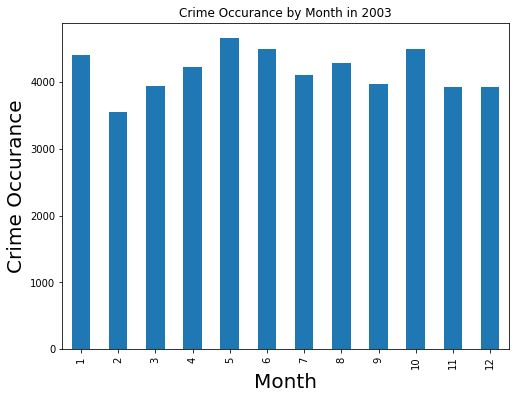

In [178]:
crime_2003 = crime_data.loc[crime_data['YEAR'] == 2003] #Filtering down data to highest crime year 2003
crime_month_2003 = crime_2003["MONTH"].value_counts()
crime_month_2003.sort_index(inplace=True)
month_plot = crime_month_2003.plot.bar(title='Crime Occurance by Month in 2003', figsize=(8,6))
month_plot.set_xlabel('Month',size=20)
month_plot.set_ylabel('Crime Occurance',size=20)

Text(0, 0.5, 'Crime Occurance')

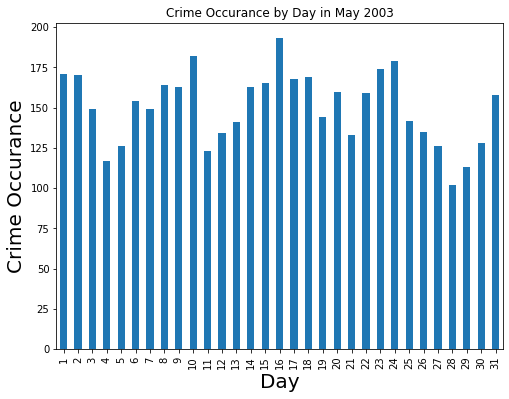

In [179]:
crime_days = crime_2003.loc[crime_2003['MONTH'] == 5] #filtering down to month 5, May 2003
crime_day = crime_days["DAY"].value_counts()
crime_day.sort_index(inplace=True)
crime_day_plot = crime_day.plot.bar(title='Crime Occurance by Day in May 2003', figsize=(8,6))
crime_day_plot.set_xlabel('Day',size=20)
crime_day_plot.set_ylabel('Crime Occurance',size=20)

Text(0, 0.5, 'Crime Occurance')

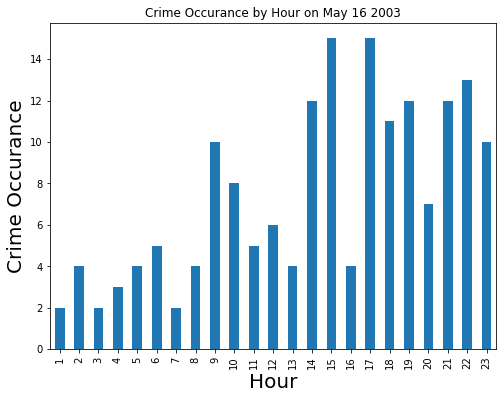

In [180]:
crime_hours = crime_days.loc[crime_days['HOUR'] != 0] #taking out 0 because it is an outlier
crime_hours = crime_hours.loc[crime_data['DAY'] == 16] #Filtering down to highest crime day May 16 2003
crime_hour = crime_hours["HOUR"].value_counts()
crime_hour.sort_index(inplace=True)
crime_hour_plot = crime_hour.plot.bar(title='Crime Occurance by Hour on May 16 2003', figsize=(8,6))
crime_hour_plot.set_xlabel('Hour',size=20)
crime_hour_plot.set_ylabel('Crime Occurance',size=20)

In [181]:
crime_neighborhood = crime_data["NEIGHBOURHOOD"].value_counts()
print(crime_neighborhood)

Central Business District    137513
West End                      48722
Fairview                      36723
Mount Pleasant                36378
Grandview-Woodland            31599
Renfrew-Collingwood           31097
Kitsilano                     30670
Kensington-Cedar Cottage      28418
Strathcona                    25809
Hastings-Sunrise              21272
Sunset                        19686
Marpole                       15137
Riley Park                    14663
Victoria-Fraserview           12310
Killarney                     11847
Oakridge                       9281
Dunbar-Southlands              8792
Kerrisdale                     8470
Arbutus Ridge                  6819
West Point Grey                6761
Shaughnessy                    6321
South Cambie                   6043
Stanley Park                   4174
Musqueam                        571
Name: NEIGHBOURHOOD, dtype: int64


Central Business District    137513
West End                      48722
Fairview                      36723
Mount Pleasant                36378
Grandview-Woodland            31599
Renfrew-Collingwood           31097
Kitsilano                     30670
Kensington-Cedar Cottage      28418
Strathcona                    25809
Hastings-Sunrise              21272
Name: NEIGHBOURHOOD, dtype: int64


Text(0, 0.5, 'Crime Occurance')

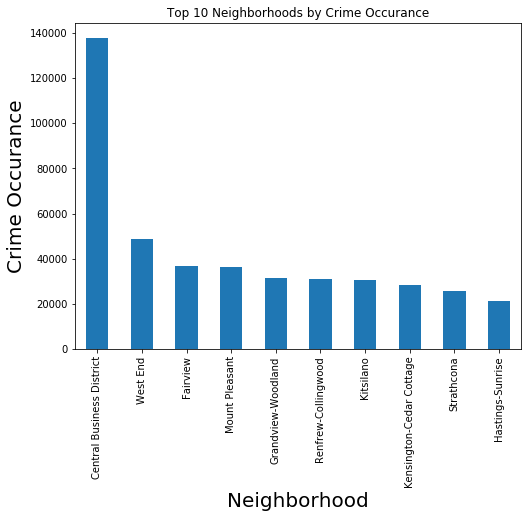

In [182]:
crime_neighborhood_top = crime_neighborhood.iloc[:10] #filtering down to top 10 neighboorhoods by crime occurance for all years
print(crime_neighborhood_top)
top_neighborhood_plot = crime_neighborhood_top.plot.bar(title='Top 10 Neighborhoods by Crime Occurance', figsize=(8,6))
top_neighborhood_plot.set_xlabel('Neighborhood',size=20)
top_neighborhood_plot.set_ylabel('Crime Occurance',size=20)

In [183]:
crime_year_mean = crime_year.mean()
crime_year_mode = crime_year.mode()
crime_year_var = crime_year.var()
crime_year_quartiles = crime_year.quantile([0.25, 0.75])

print("The average crimes commited in a year is ", crime_year_mean)
print("The variance of crimes commited in a year is ", crime_year_var)
print("The upper and lower quartiles of crimes commited in a year is ", crime_year_quartiles)
print("The mode for crimes commited in a year is\n", crime_year)

The average crimes commited in a year is  36708.117647058825
The variance of crimes commited in a year is  44251482.36029411
The upper and lower quartiles of crimes commited in a year is  0.25    32179.0
0.75    38077.0
Name: YEAR, dtype: float64
The mode for crimes commited in a year is
 2003    49993
2004    49301
2005    44692
2006    42321
2007    37695
2008    35414
2009    32179
2010    29704
2011    28587
2012    29240
2013    29093
2014    32673
2015    34354
2016    37845
2017    36998
2018    38077
2019    35872
Name: YEAR, dtype: int64


In [184]:
crime_month_mean = crime_month_2003.mean()
crime_month_var = crime_month_2003.var()
crime_month_quartiles = crime_month_2003.quantile([0.25, 0.75])

print("The average number of crimes commited in each month in 2003 is ", crime_month_mean)
print("The variance of crimes commited in each month in 2003 is ", crime_month_var)
print("The upper and lower quartiles of crimes commited in each in 2003 is ", crime_month_quartiles)
print("The mode for crimes commited in each month in 2003 is\n", crime_month_2003)

The average number of crimes commited in each month in 2003 is  4166.083333333333
The variance of crimes commited in each month in 2003 is  100697.71969696971
The upper and lower quartiles of crimes commited in each in 2003 is  0.25    3936.50
0.75    4429.75
Name: MONTH, dtype: float64
The mode for crimes commited in each month in 2003 is
 1     4410
2     3556
3     3939
4     4220
5     4654
6     4489
7     4107
8     4291
9     3977
10    4497
11    3924
12    3929
Name: MONTH, dtype: int64


In [185]:
crime_day_mean = crime_day.mean()
crime_day_var = crime_day.var()
crime_day_quartiles = crime_day.quantile([0.25, 0.75])
crime_day_mode = crime_days["DAY"].value_counts()

print("The average number of crimes commited in each day in May 2003 is ", crime_day_mean)
print("The variance of crimes commited in each day in May 2003 is ", crime_day_var)
print("The upper and lower quartiles of crimes commited in a day in May 2003 is ", crime_day_quartiles)
print("The mode for crimes commited in each day is\n", crime_day_mode)

The average number of crimes commited in each day in May 2003 is  150.1290322580645
The variance of crimes commited in each day in May 2003 is  497.18279569892474
The upper and lower quartiles of crimes commited in a day in May 2003 is  0.25    133.5
0.75    166.5
Name: DAY, dtype: float64
The mode for crimes commited in each day is
 16    193
10    182
24    179
23    174
1     171
2     170
18    169
17    168
15    165
8     164
9     163
14    163
20    160
22    159
31    158
6     154
3     149
7     149
19    144
25    142
13    141
26    135
12    134
21    133
30    128
27    126
5     126
11    123
4     117
29    113
28    102
Name: DAY, dtype: int64


In [186]:
crime_hour_mean = crime_hour.mean()
crime_hour_var = crime_hour.var()
crime_hour_quartiles = crime_hour.quantile([0.25, 0.75])
crime_hour_mode = crime_hours["HOUR"].value_counts()

print("The average number of crimes commited in each hour on May 16 2003 is ", crime_hour_mean)
print("The variance of crimes commited in each hour on May 16 2003 ", crime_hour_var)
print("The upper and lower quartiles of crimes commited each hour on May 16 2003 is ", crime_hour_quartiles)
print("The mode for crimes commited in each hour on May 16th is\n", crime_hour_mode)

The average number of crimes commited in each hour on May 16 2003 is  7.391304347826087
The variance of crimes commited in each hour on May 16 2003  18.885375494071152
The upper and lower quartiles of crimes commited each hour on May 16 2003 is  0.25     4.0
0.75    11.5
Name: HOUR, dtype: float64
The mode for crimes commited in each hour on May 16th is
 17    15
15    15
22    13
21    12
19    12
14    12
18    11
23    10
9     10
10     8
20     7
12     6
11     5
6      5
13     4
16     4
8      4
5      4
2      4
4      3
7      2
3      2
1      2
Name: HOUR, dtype: int64


In [187]:
pmf= thinkstats2.Pmf(crime_data.MONTH)#checking to see how the PMF looks among the months
pmf

Pmf({8: 0.09073646156163567, 10: 0.08783599716683921, 7: 0.08736967941054873, 9: 0.08687932465651131, 5: 0.08584893868642615, 6: 0.08555408484739711, 1: 0.0834596611103811, 3: 0.08265362045260065, 4: 0.08088770235145937, 11: 0.08027395767565437, 12: 0.07489608004640744, 2: 0.07360449203413895})

In [188]:
crime_type_mode = crime_data["TYPE"].value_counts()
crime_type_mode #results shows theft from vehicle has the most occurence

Theft from Vehicle                                        209609
Mischief                                                   83970
Break and Enter Residential/Other                          66378
Other Theft                                                64611
Offence Against a Person                                   62078
Theft of Vehicle                                           41528
Break and Enter Commercial                                 38916
Theft of Bicycle                                           31112
Vehicle Collision or Pedestrian Struck (with Injury)       25294
Vehicle Collision or Pedestrian Struck (with Fatality)       290
Homicide                                                     252
Name: TYPE, dtype: int64

In [189]:
#going to do PMF comparing Theft from Vechile compared to other crimes
Theft_Vehicle=crime_data[crime_data["TYPE"]=="Theft from Vehicle"]#filtering the data set to just Theft from Vehicle
Other_Crimes=crime_data[crime_data["TYPE"]!="Theft from Vehicle"]#filtering to other crimes that aren't theft from vehicle


In [190]:
Theft_Vehicle_pmf = thinkstats2.Pmf(Theft_Vehicle.YEAR, label='Theft from Vehicle')#calculating PMF for Theft Vehicle per year
Other_Crimes_pmf = thinkstats2.Pmf(Other_Crimes.YEAR, label='Other Crime')#calculating PMF for all other types of crime per year
Theft_Vehicle_pmf

Pmf({2004: 0.08684741590294309, 2003: 0.08465285364655142, 2005: 0.07897561650501647, 2018: 0.07158566664599325, 2019: 0.07103702608189533, 2006: 0.07029278322972772, 2017: 0.06182940618007814, 2016: 0.061142412778077276, 2007: 0.05832764814487927, 2008: 0.05390035733198479, 2015: 0.05031272512153581, 2014: 0.048375785390894474, 2009: 0.047741270651546444, 2010: 0.04108602206966304, 2013: 0.039793138653397515, 2012: 0.03862906650000715, 2011: 0.035470805165808715}, 'Theft from Vehicle')

In [191]:
Other_Crimes_pmf

Pmf({2003: 0.07781550036315027, 2004: 0.07503577211054246, 2005: 0.06789582775336668, 2006: 0.06656628759087806, 2007: 0.06145564137644808, 2016: 0.060393939613299266, 2008: 0.058190908454765475, 2017: 0.05800269768766182, 2015: 0.05744771722056131, 2018: 0.05567177972583966, 2014: 0.054371195065982356, 2009: 0.05350011702848981, 2011: 0.05103889930482665, 2012: 0.05101718267785315, 2010: 0.05089412179166999, 2019: 0.05062869635088278, 2013: 0.05007371588378227}, 'Other Crime')

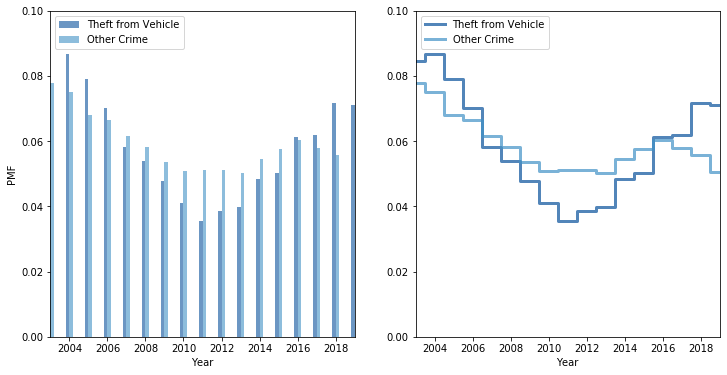

In [192]:
width=0.2
axis = [2003, 2019, 0, 0.1] 
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Theft_Vehicle_pmf, align='right', width=width) #The probability of theft from vehicle occuring between 2003-
#-2019 is x percentage, the probability of other crime occuring between 2003-2019 is x percentage.
thinkplot.Hist(Other_Crimes_pmf , align='left', width=width)
thinkplot.Config(xlabel='Year', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Theft_Vehicle_pmf, Other_Crimes_pmf ])
thinkplot.Config(xlabel='Year', axis=axis)

In [193]:
#going to do PMF comparing 2003 to 2019 by crime types to see if a crime became more prevalent
Crime_2003=crime_data[crime_data["YEAR"]==2003]#filtering the data set to just Theft from Vehicle
Crime_2019=crime_data[crime_data["YEAR"]==2019]#filtering to other crimes that aren't theft from vehicle
Crime_Type_2003pmf = thinkstats2.Pmf(Crime_2003.TYPE, label='Crime 2003')#calculating PMF for Theft Vehicle per year
Crime_Type_2019pmf= thinkstats2.Pmf(Crime_2019.TYPE, label='Crime 2019')#calculating PMF 4for all other types of crime per year

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

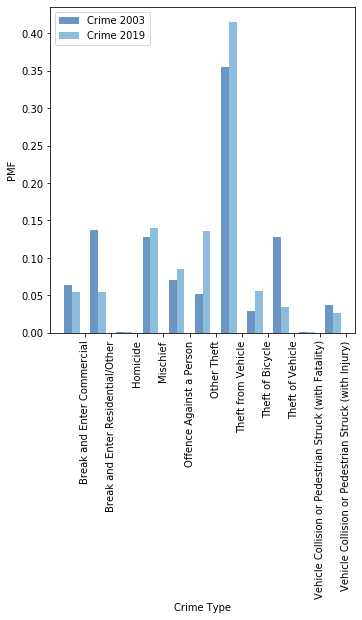

In [194]:
Crime_Types = ['Theft from Vehicle','Mischief','Break and Enter Residential/Other','Other Theft','Offence Against a Person','Theft of Vehicle','Break and Enter Commercial','Theft of Bicycle','Vehicle Collision or Pedestrian Struck (with Injury)','Vehicle Collision or Pedestrian Struck (with Fatality)','Homicide']
x = np.arange(len(Crime_Types))

width=0.3
axis = [crime_data.TYPE, 0, 0.5]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Crime_Type_2003pmf, align='right', width=width)
thinkplot.Hist(Crime_Type_2019pmf , align='left', width=width)
thinkplot.Config(xlabel='Crime Type', ylabel='PMF')
plt.xticks(rotation=90)

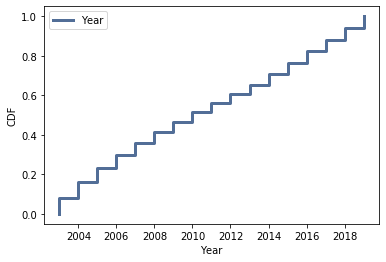

<Figure size 576x432 with 0 Axes>

In [195]:
Year_CDF= thinkstats2.Cdf(crime_data.YEAR, label='Year')#CDF of crime from 2003-2019
thinkplot.Cdf(Year_CDF)#plot the CDF
thinkplot.Show(xlabel='Year', ylabel='CDF')
# step size in the middle show slow down of crime, but starts to pick up again

In [196]:
#since the histogram showed the neighbourhood of Central Business District with the most crime drilling down to that
Crime_centraldistrict=crime_data[crime_data["NEIGHBOURHOOD"]=="Central Business District"]
crime_centraldistrict_year = Crime_centraldistrict["YEAR"].dropna()
#crime_centraldistrict_yearv= Crime_centraldistrict["YEAR"].value_counts()
#crime_centraldistrict_yearv

n, mean, std 137513 2011.264011635241 5.196539934665998


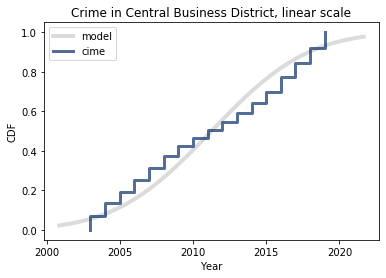

In [197]:
def MakeNormalModel(crime_centraldistrict_year):
    """Plots a CDF with a Normal model.

    """
    cdf = thinkstats2.Cdf(crime_centraldistrict_year, label='cime')

    mean, var = thinkstats2.TrimmedMeanVar(crime_centraldistrict_year)
    std = np.sqrt(var)
    print('n, mean, std', len(crime_centraldistrict_year), mean, std)

    xmin = mean - 2 * std
    xmax = mean + 2 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)


MakeNormalModel(crime_centraldistrict_year)
thinkplot.Config(title='Crime in Central Business District, linear scale', xlabel='Year',
                 ylabel='CDF', loc='upper left')



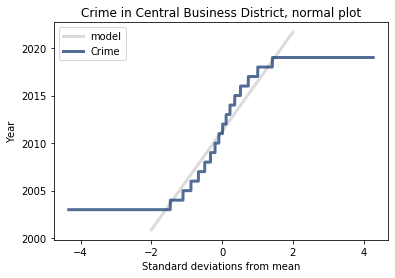

In [198]:
def MakeNormalPlot(crime_centraldistrict_year):
    """Generates a normal probability plot of Crime in Central Business District,.

    """
    mean, var = thinkstats2.TrimmedMeanVar(crime_centraldistrict_year, p=0.01)
    std = np.sqrt(var)

    xs = [-2, 2]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(crime_centraldistrict_year)
    thinkplot.Plot(xs, ys, label='Crime')

MakeNormalPlot(crime_centraldistrict_year)
thinkplot.Config(title='Crime in Central Business District, normal plot', xlabel='Standard deviations from mean',
                 ylabel='Year', loc='upper left')

In [199]:
Crimes_new=crime_data[crime_data["HOUR"]!=0]
Crimes_new=Crimes_new.dropna()
Crimes_new.HOUR

1          2
2          4
3          5
4          3
5          4
          ..
624033    13
624034     9
624035    16
624036    20
624037    18
Name: HOUR, Length: 527222, dtype: int64

In [200]:
crime_data['TIME'] = crime_data['MONTH'].map(str) + crime_data['YEAR'].map(str) #Adding Day to Time hour variable which will be used to scale down to specific minute
crime_data['TIME'] = crime_data['TIME'].apply('{:0>6}'.format)

crime_data['TIME'] = crime_data['DAY'].map(str) + crime_data['TIME'].map(str) #Adding Day to Time hour variable which will be used to scale down to specific minute
crime_data['TIME'] = crime_data['TIME'].apply('{:0>8}'.format)

crime_data.sort_values("TIME", inplace=True)
print(crime_data)

                            TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
476428        Theft from Vehicle  2003      1    1    21      21   
565975          Theft of Vehicle  2003      1    1    13      30   
333294        Theft from Vehicle  2003      1    1     1      30   
153463                  Mischief  2003      1    1     1      46   
218780  Offence Against a Person  2003      1    1     0       0   
...                          ...   ...    ...  ...   ...     ...   
192137  Offence Against a Person  2018     12   31     0       0   
381923        Theft from Vehicle  2018     12   31     9      30   
488453        Theft from Vehicle  2018     12   31     0       0   
522643        Theft from Vehicle  2018     12   31    21       0   
423399        Theft from Vehicle  2018     12   31    13       0   

                    HUNDRED_BLOCK       NEIGHBOURHOOD              X  \
476428             81XX POPLAR ST              Sunset  493210.070208   
565975               18XX VINE ST      

In [201]:
Crime_Types = crime_data.groupby(by='TIME', as_index=False).agg({'TYPE': pd.Series.nunique}) #Grabbing count of crime type involved in crimes by time
Crime_Neighbourhood = crime_data.groupby(by='TIME', as_index=False).agg({'NEIGHBOURHOOD': pd.Series.nunique})#Grabbing count of neighborhoods involved in crimes by time
Types_Neighborhood = pd.merge(Crime_Types, Crime_Neighbourhood, on='TIME') #Merging the two datasets for Crime Types and Crime Neighbourhoods
print(Types_Neighborhood)

          TIME  TYPE  NEIGHBOURHOOD
0     01012003     9             21
1     01012004     9             20
2     01012005     9             22
3     01012006     9             20
4     01012007     9             20
...        ...   ...            ...
6158  31122014     9             18
6159  31122015     9             22
6160  31122016     9             20
6161  31122017     9             19
6162  31122018     8             20

[6163 rows x 3 columns]


Text(0, 0.5, 'Count of Unique Crime Types')

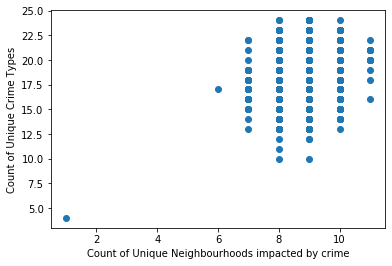

In [202]:
plt.scatter(Types_Neighborhood.TYPE, Types_Neighborhood.NEIGHBOURHOOD)
plt.xlabel('Count of Unique Neighbourhoods impacted by crime')
plt.ylabel('Count of Unique Crime Types') #Is there a correlation between number of types of crimes committed and unique neighborhoods impacted

Is there a correlation between number of types of crimes committed and unique neighborhoods impacted

In [203]:
pearsoncorr1 = Types_Neighborhood.corr(method='pearson')
pearsoncorr1

,TYPE,NEIGHBOURHOOD
TYPE,1.000000,0.164937
NEIGHBOURHOOD,0.164937,1.000000


In [204]:
cov1=Types_Neighborhood.cov()
cov1

,TYPE,NEIGHBOURHOOD
TYPE,0.213122,0.152856
NEIGHBOURHOOD,0.152856,4.029932


In [205]:
crime_data['Crimes_Per_Day']=crime_data.groupby(['TIME'])['TIME'].transform('count') #adding a new column to count for crimes per day
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME,Crimes_Per_Day
476428,Theft from Vehicle,2003,1,1,21,21,81XX POPLAR ST,Sunset,493210.070208,5.451005e+06,01012003,194
565975,Theft of Vehicle,2003,1,1,13,30,18XX VINE ST,Kitsilano,488550.900860,5.457475e+06,01012003,194
333294,Theft from Vehicle,2003,1,1,1,30,12XX ALBERNI ST,West End,490830.087564,5.459359e+06,01012003,194
153463,Mischief,2003,1,1,1,46,45XX MAIN ST,Riley Park,492627.838215,5.454544e+06,01012003,194
218780,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.000000,0.000000e+00,01012003,194


Text(0, 0.5, 'Count of crimes that day')

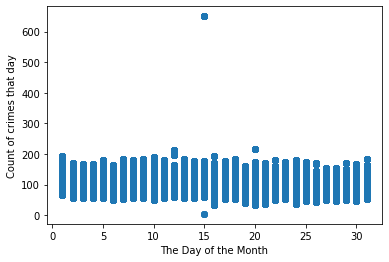

In [206]:
plt.scatter(crime_data.DAY, crime_data.Crimes_Per_Day)#checking to see if there is a relationship between the number of crimes and the day of the month
plt.xlabel('The Day of the Month')
plt.ylabel('Count of crimes that day')

In [207]:
pearsoncorr3 = crime_data.corr(method='pearson')
pearsoncorr3

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Crimes_Per_Day
YEAR,1.000000,-0.001740,-0.008111,-0.006974,0.052492,-0.002711,-0.002655,-0.310193
MONTH,-0.001740,1.000000,0.006583,0.002129,-0.003783,0.003530,0.003407,0.028093
DAY,-0.008111,0.006583,1.000000,0.001878,0.003289,-0.003983,-0.004025,-0.109340
HOUR,-0.006974,0.002129,0.001878,1.000000,0.113185,0.540182,0.540229,0.041346
MINUTE,0.052492,-0.003783,0.003289,0.113185,1.000000,0.281291,0.281143,-0.025518
X,-0.002711,0.003530,-0.003983,0.540182,0.281291,1.000000,0.999843,0.042003
Y,-0.002655,0.003407,-0.004025,0.540229,0.281143,0.999843,1.000000,0.042313
Crimes_Per_Day,-0.310193,0.028093,-0.109340,0.041346,-0.025518,0.042003,0.042313,1.000000


In [208]:
cov3=crime_data.cov()
cov3

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Crimes_Per_Day
YEAR,26.694373,-0.030456,-0.366439,-2.743058e-01,4.950307e+00,-2.067761e+03,-2.244222e+04,-4.957549e+01
MONTH,-0.030456,11.483319,0.195077,5.492409e-02,-2.339704e-01,1.765824e+03,1.889260e+04,2.944784e+00
DAY,-0.366439,0.195077,76.461510,1.250464e-01,5.249924e-01,-5.141743e+03,-5.758562e+04,-2.957508e+01
HOUR,-0.274306,0.054924,0.125046,5.795449e+01,1.572766e+01,6.071041e+05,6.729752e+06,9.736570e+00
MINUTE,4.950307,-0.233970,0.524992,1.572766e+01,3.331680e+02,7.579526e+05,8.396774e+06,-1.440788e+01
X,-2067.760789,1765.824368,-5141.743294,6.071041e+05,7.579526e+05,2.179385e+10,2.415262e+11,1.918065e+05
Y,-22442.218459,18892.601336,-57585.616815,6.729752e+06,8.396774e+06,2.415262e+11,2.677510e+12,2.141703e+06
Crimes_Per_Day,-49.575490,2.944784,-29.575081,9.736570e+00,-1.440788e+01,1.918065e+05,2.141703e+06,9.568631e+02


In [209]:
crime_data['MONYEAR'] = crime_data['MONTH'].map(str) + crime_data['YEAR'].map(str)#creating a new column and combining month and year
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME,Crimes_Per_Day,MONYEAR
476428,Theft from Vehicle,2003,1,1,21,21,81XX POPLAR ST,Sunset,493210.070208,5.451005e+06,01012003,194,12003
565975,Theft of Vehicle,2003,1,1,13,30,18XX VINE ST,Kitsilano,488550.900860,5.457475e+06,01012003,194,12003
333294,Theft from Vehicle,2003,1,1,1,30,12XX ALBERNI ST,West End,490830.087564,5.459359e+06,01012003,194,12003
153463,Mischief,2003,1,1,1,46,45XX MAIN ST,Riley Park,492627.838215,5.454544e+06,01012003,194,12003
218780,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.000000,0.000000e+00,01012003,194,12003


In [210]:
crime_data['Crimes_Per_MONYEAR']=crime_data.groupby(['MONYEAR'])['MONYEAR'].transform('count') #adding a new column to count for crimes per month year
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME,Crimes_Per_Day,MONYEAR,Crimes_Per_MONYEAR
476428,Theft from Vehicle,2003,1,1,21,21,81XX POPLAR ST,Sunset,493210.070208,5.451005e+06,01012003,194,12003,4410
565975,Theft of Vehicle,2003,1,1,13,30,18XX VINE ST,Kitsilano,488550.900860,5.457475e+06,01012003,194,12003,4410
333294,Theft from Vehicle,2003,1,1,1,30,12XX ALBERNI ST,West End,490830.087564,5.459359e+06,01012003,194,12003,4410
153463,Mischief,2003,1,1,1,46,45XX MAIN ST,Riley Park,492627.838215,5.454544e+06,01012003,194,12003,4410
218780,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.000000,0.000000e+00,01012003,194,12003,4410


In [211]:
cat1 = crime_data[(crime_data['MONTH']==12) | (crime_data['MONTH']==1) | (crime_data['MONTH']==2)]
cat2 = crime_data[(crime_data['MONTH']!= 12) | (crime_data['MONTH']!=1) | (crime_data['MONTH']!=2)]

ttest_ind(cat1['Crimes_Per_MONYEAR'], cat2['Crimes_Per_MONYEAR'])

Ttest_indResult(statistic=-93.63082247423927, pvalue=0.0)

In [212]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

data= cat1['Crimes_Per_MONYEAR'], cat2['Crimes_Per_MONYEAR']
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Tried looking at the P value in two different ways, both show to be zero. Therefore, we can reject the null hypothesis of that there is no link between colder months and crime prevalence in Vancouver. It appears that colder months have less crime prevalence. 

In [213]:
crime_data['MONYEAR'] = crime_data['MONYEAR'].apply('{:0>6}'.format) #Changing monyear format to 6 characters which adds the preceding 0 value to months that are single digits

crime_data['TIME HOUR'] = crime_data['DAY'].map(str) + crime_data['MONYEAR'].map(str) #Adding Day to Time hour variable which will be used to scale down to specific minute
crime_data['TIME HOUR'] = crime_data['TIME HOUR'].apply('{:0>8}'.format)

crime_data['TIME HOUR'] = crime_data['HOUR'].map(str) + crime_data['MONYEAR'].map(str)
crime_data['TIME HOUR'] = crime_data['TIME HOUR'].apply('{:0>10}'.format)

crime_data['TIME HOUR'] = crime_data['MINUTE'].map(str) + crime_data['MONYEAR'].map(str)
crime_data['TIME HOUR'] = crime_data['TIME HOUR'].apply('{:0>12}'.format)

crime_data.sort_values("TIME HOUR", inplace=True)
print(crime_data)

                                                     TYPE  YEAR  MONTH  DAY  \
228153                           Offence Against a Person  2003      1   16   
192933                           Offence Against a Person  2003      1   25   
416799                                 Theft from Vehicle  2003      1   25   
437702                                 Theft from Vehicle  2003      1   25   
569233                                   Theft of Vehicle  2003      1   25   
...                                                   ...   ...    ...  ...   
270542                                        Other Theft  2018     12    3   
611875  Vehicle Collision or Pedestrian Struck (with I...  2018     12    2   
306034                                        Other Theft  2018     12   11   
140712                                           Mischief  2018     12   29   
79969                   Break and Enter Residential/Other  2018     12   17   

        HOUR  MINUTE              HUNDRED_BLOCK    

In [214]:
crime_data['Crimes_Per_Minute']=crime_data.groupby(['TIME HOUR'])['TIME HOUR'].transform('count') #adding a new column to count for crimes per minute
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME,Crimes_Per_Day,MONYEAR,Crimes_Per_MONYEAR,TIME HOUR,Crimes_Per_Minute
228153,Offence Against a Person,2003,1,16,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.000000,0.000000e+00,16012003,128,012003,4410,000000012003,2277
192933,Offence Against a Person,2003,1,25,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.000000,0.000000e+00,25012003,144,012003,4410,000000012003,2277
416799,Theft from Vehicle,2003,1,25,23,0,36XX W 37TH AVE,Dunbar-Southlands,486504.507643,5.453990e+06,25012003,144,012003,4410,000000012003,2277
437702,Theft from Vehicle,2003,1,25,1,0,52XX MELBOURNE ST,Renfrew-Collingwood,497909.174686,5.453684e+06,25012003,144,012003,4410,000000012003,2277
569233,Theft of Vehicle,2003,1,25,20,0,21XX VENABLES ST,Grandview-Woodland,495515.246064,5.458204e+06,25012003,144,012003,4410,000000012003,2277


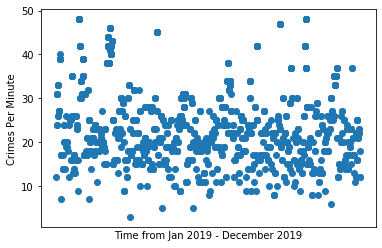

In [215]:
Crime_Minute = crime_data[(crime_data['TYPE']=="Theft from Vehicle")] #Filtering down to specific crime
Crime_Minute = Crime_Minute[(Crime_Minute['NEIGHBOURHOOD']=="Central Business District")] #Filtering down to specific neighbourhood
Crime_Minute = Crime_Minute[(Crime_Minute['YEAR']==2019)] #Filtering down to specific year
Crime_Minute = Crime_Minute[(Crime_Minute['Crimes_Per_Minute']<50)] #Taking out outliers, I just picked 60 as a reference
Crime_Minute.sort_values("TIME HOUR", inplace=True) #Sorting by time variable



plt.scatter(Crime_Minute['TIME HOUR'], Crime_Minute.Crimes_Per_Minute) #Plotting scatterplot
plt.xlabel('Time from Jan 2019 - December 2019')
plt.ylabel('Crimes Per Minute')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

In [216]:
minute_formula = 'Crimes_Per_Minute ~ MINUTE + HOUR + DAY + MONTH' #Multiple Regression Model
minute_model = smf.ols(minute_formula, data=Crime_Minute) #Creating OLS model predicting how much crime is comitted per minute
results = minute_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Crimes_Per_Minute   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     10.17
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.15e-08
Time:                        22:15:58   Log-Likelihood:                -4796.3
No. Observations:                1331   AIC:                             9603.
Df Residuals:                    1326   BIC:                             9629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0770      0.940     25.601      0.000      22.232      25.922
MINUTE        -0.0756      0.014     -5.458      0.000      -0.103      -0.048
HOUR           0.0832      0.038      2.210      0.027       0.009       0.157
DAY            0.0398      0.029      1.370      0.171      -0.017       0.097
MONTH          0.1363      0.077      1.770      0.077      -0.015       0.287
==============================================================================
Omnibus:                       84.396   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.870
Skew:                           0.670   Prob(JB):                     2.06e-22
Kurtosis:                       3.065   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared value is very low meaning that this model doesn't fit very well with the data. We can't really predict how many crimes will occur based on time of day. Based on the p values MINUTE seems to stand out as a likely predictor